In [1]:
import pandas as pd

In [50]:
import requests
import warnings
warnings.filterwarnings('ignore')
import json
from pprint import pprint


from os import path

import matplotlib
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('activity.csv')

In [6]:
df

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566
1,4/27/18,"3,649","9,971",4.70,19,"1,158",219,46,17,"1,752"
2,4/28/18,"3,379","3,521",1.66,2,702,155,22,11,"1,124"
3,4/29/18,"2,851","1,639",0.77,0,891,122,0,0,602
4,4/30/18,"2,825","1,323",0.62,0,880,104,0,0,540
5,5/1/18,"3,292","2,581",1.22,0,919,167,13,2,"1,068"
6,5/2/18,"2,660","1,372",0.65,0,927,90,0,0,419
7,5/3/18,"3,121","2,232",1.05,0,876,157,16,0,"1,006"
8,5/4/18,"2,522",904,0.43,1,"1,012",61,0,0,269
9,5/5/18,"2,551",833,0.39,0,969,68,0,0,326


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null object
Calories Burned           225 non-null object
Steps                     225 non-null object
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null object
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 17.7+ KB


In [28]:
df['Date'] = pd.to_datetime(df.Date)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
Calories Burned           225 non-null object
Steps                     225 non-null object
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null object
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 17.7+ KB


In [35]:
for i in df['Calories Burned']:
    df['Calories Burned'][df['Calories Burned'] == i] = i.replace(',',"")
df['Calories Burned'] = df['Calories Burned'].astype('int')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
Calories Burned           225 non-null int64
Steps                     225 non-null object
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null object
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 17.7+ KB


In [41]:
for var in df.select_dtypes('object'):
    for i in df[var]:
        df[var][df[var]==i] = i.replace(',',"")
    df[var] = df[var].astype('int')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
Calories Burned           225 non-null int64
Steps                     225 non-null int64
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null int64
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 17.7 KB


In [43]:
df

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-04-26,2635,2931,1.38,2,1347,93,0,0,566
1,2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752
2,2018-04-28,3379,3521,1.66,2,702,155,22,11,1124
3,2018-04-29,2851,1639,0.77,0,891,122,0,0,602
4,2018-04-30,2825,1323,0.62,0,880,104,0,0,540
5,2018-05-01,3292,2581,1.22,0,919,167,13,2,1068
6,2018-05-02,2660,1372,0.65,0,927,90,0,0,419
7,2018-05-03,3121,2232,1.05,0,876,157,16,0,1006
8,2018-05-04,2522,904,0.43,1,1012,61,0,0,269
9,2018-05-05,2551,833,0.39,0,969,68,0,0,326


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
Calories Burned           225 non-null int64
Steps                     225 non-null int64
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null int64
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 17.7 KB


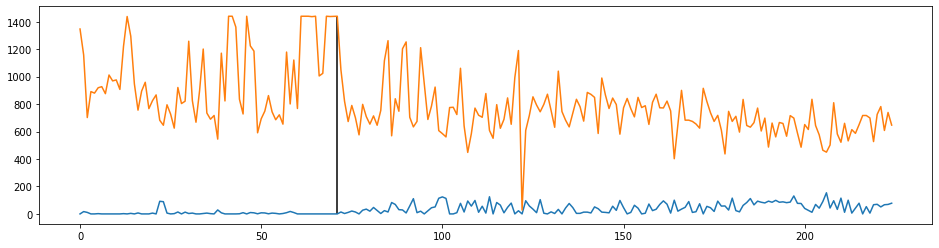

In [78]:
plt.figure(figsize = (16,4))
plt.plot(df['Minutes Very Active'])
plt.plot(df['Minutes Sedentary'])
plt.vlines(x=71, ymin = min(df['Minutes Very Active']), ymax = max(df['Minutes Sedentary']))

In [55]:
df['Minutes Sedentary'].describe()

count     225.000000
mean      809.520000
std       243.232639
min        28.000000
25%       654.000000
50%       750.000000
75%       877.000000
max      1440.000000
Name: Minutes Sedentary, dtype: float64

In [68]:
df['Minutes Sedentary'].value_counts(bins = 10).sort_index()

(26.587, 169.2]      1
(169.2, 310.4]       0
(310.4, 451.6]       4
(451.6, 592.8]      23
(592.8, 734.0]      75
(734.0, 875.2]      64
(875.2, 1016.4]     23
(1016.4, 1157.6]     6
(1157.6, 1298.8]    14
(1298.8, 1440.0]    15
Name: Minutes Sedentary, dtype: int64

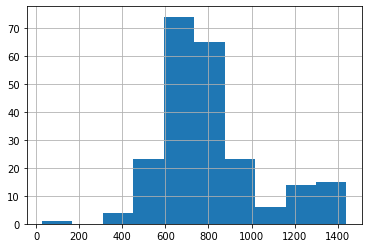

In [69]:
df['Minutes Sedentary'].hist()

In [72]:
max_sedentary = df['Minutes Sedentary'].max()
df['Minutes Sedentary'][df['Minutes Sedentary'] == max_sedentary]

41    1440
42    1440
46    1440
61    1440
62    1440
63    1440
65    1440
68    1440
71    1440
Name: Minutes Sedentary, dtype: int64

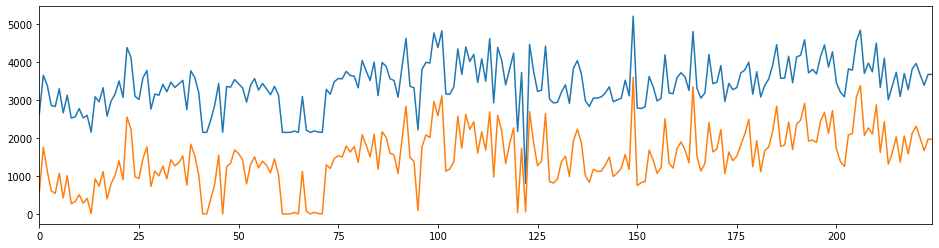

In [80]:
df['Calories Burned'].plot(figsize=(16,4))
df['Activity Calories'].plot(figsize=(16,4))

In [ ]:
df['Calories Burned'] + df[]